# Basic Idea

A word is a sequence of characters. Bigram is using the previous char to predict the next char.

In [24]:
import torch

In [2]:
with open("names.txt") as f:
    words = f.read().split()

In [4]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [5]:
max(words, key=len)

'muhammadibrahim'

In [6]:
min(words, key=len)

'an'

In [9]:
# what does bigram look like
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)

. e
e m
m m
m a
a .


In [21]:
char_set = sorted(set(''.join(words)))
ctoi = {c:i+1 for i, c in enumerate(char_set)}
ctoi['.'] = 0
itoc = {i:c for c, i in ctoi.items()}

In [22]:
itoc

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [82]:
M = torch.zeros(27, 27, dtype=torch.int32)

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1, ix2 = ctoi[ch1], ctoi[ch2]
        M[ix1, ix2] += 1


In [84]:
M[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [31]:
import matplotlib.pyplot as plt

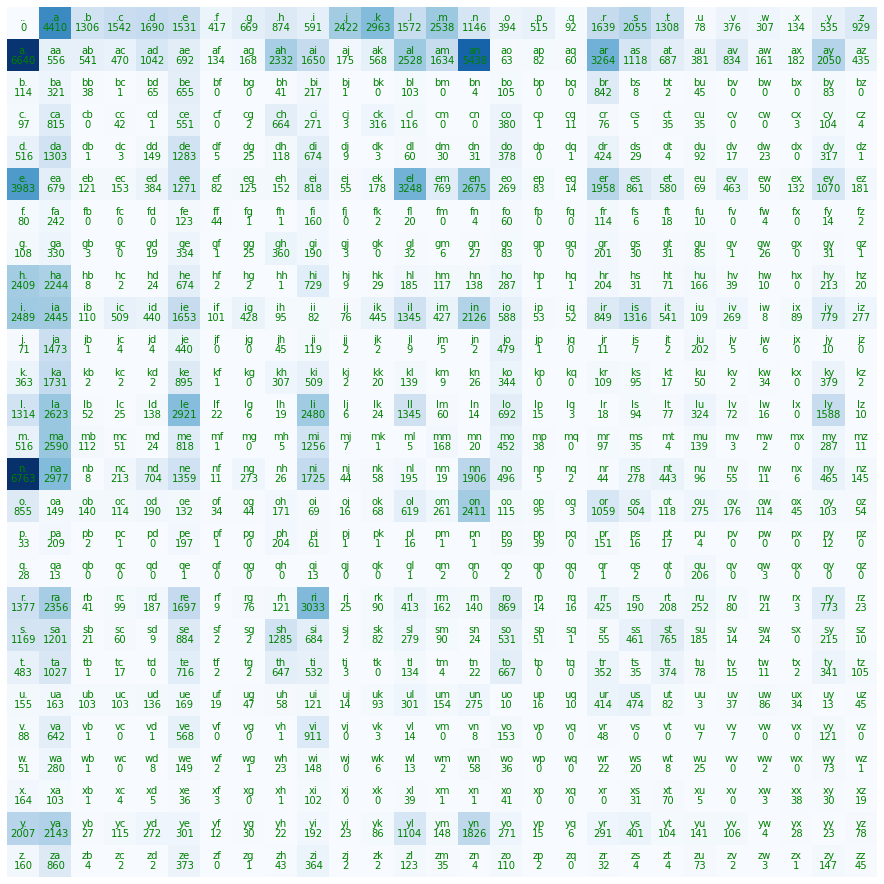

In [85]:
plt.figure(figsize=(16,16))
plt.imshow(M, cmap='Blues')
plt.axis("off")
for i in range(27):
    for j in range(27):
        s = itoc[i] + itoc[j]
        plt.text(j, i, s, ha='center', va='bottom', color='green')
        plt.text(j,i, M[i, j].item(), ha='center', va='top', color='green')

In [80]:

p = torch.tensor([0.1, 0.9])
torch.multinomial(p, 1, replacement=True, generator = g).item()

1

In [94]:
P = M / M.sum(dim=1, keepdim=True)
g = torch.Generator().manual_seed(1234)
idx = 0

for i in range(30):
    out = []
    while True:
        idx = torch.multinomial(P[idx], 1, replacement=True, generator = g).item()
        c = itoc[idx]
        out.append(c)
        if c == '.':
            print("".join(out))
            break

d.
jaiaaccor.
neegeariceja.
alethyarefy.
alaley.
rapra.
bi.
sh.
zliy.
s.
oyay.
shartelalenipiilvixxurh.
riramiyvabya.
hich.
ameyahiyptaio.
cakianollyde.
lesamameynigarimmelllu.
ca.
mmie.
sahinin.
ri.
ha.
ja.
kumyambama.
made.
pheipa.
m.
abynngtasson.
jaloseeeviyo.
obi.
